<a href="https://colab.research.google.com/github/PRIEST099/tensorflow-image-classification-project/blob/master/tensorflow_fashion_mnist_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

7


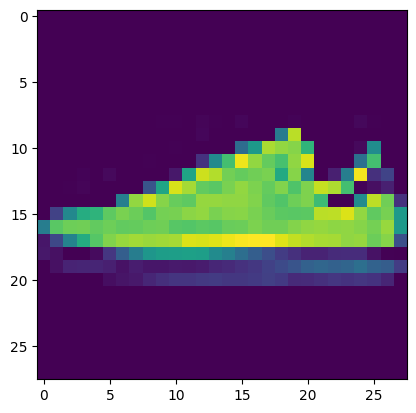

In [5]:
# plot a sample image
import matplotlib.pyplot as plt

plt.imshow(train_data[6]);

In [6]:
# classifiying labels with actual human readable names

class_name = ["t_shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'Shirt')

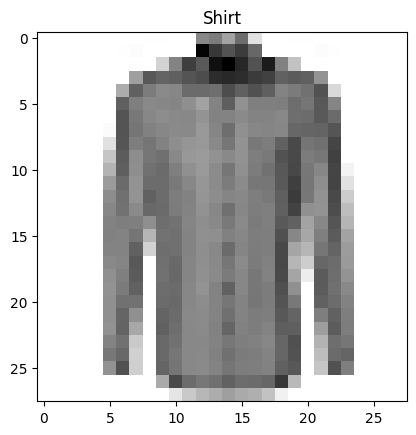

In [12]:
#plot an ecample image and its label
index = 3000
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index]])

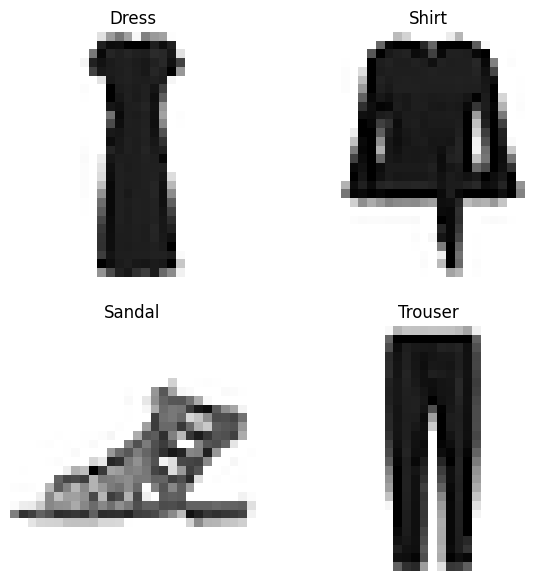

In [20]:
# plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

***you can run tha above code to see different image categories. this helps to visualise the kind of dataset im working on***

In [32]:
# Building a multiclass classification model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compiling the model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.2),
                metrics=["accuracy"])

# fitting the model
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3244 - accuracy: 0.1243 - val_loss: 2.2134 - val_accuracy: 0.1376
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9825 - accuracy: 0.1904 - val_loss: 1.7274 - val_accuracy: 0.2455
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6541 - accuracy: 0.2877 - val_loss: 1.5975 - val_accuracy: 0.3224
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5695 - accuracy: 0.3269 - val_loss: 1.5525 - val_accuracy: 0.3319
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5303 - accuracy: 0.3393 - val_loss: 1.5176 - val_accuracy: 0.3480
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5061 - accuracy: 0.3467 - val_loss: 1.4902 - val_accuracy: 0.3517
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4890 - accuracy: 0.3545 - val_loss: 1.4818 - val_accuracy:

In [26]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum -> normalisation

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [35]:
# building a model to fing patterns in our new noemalized data

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compiling the model

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fitting the model
norm_history = model_2.fit(train_data_norm,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2580 - accuracy: 0.4951 - val_loss: 0.8963 - val_accuracy: 0.6629
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7646 - accuracy: 0.7176 - val_loss: 0.7385 - val_accuracy: 0.7266
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6801 - accuracy: 0.7536 - val_loss: 0.7022 - val_accuracy: 0.7555
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6481 - accuracy: 0.7682 - val_loss: 0.6746 - val_accuracy: 0.7631
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6329 - accuracy: 0.7729 - val_loss: 0.6535 - val_accuracy: 0.7696
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6212 - accuracy: 0.7771 - val_loss: 0.6560 - val_accuracy: 0.7726
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6133 - accuracy: 0.7800 - val_loss: 0.6552 - val_accuracy:

**NEURO NETWORKS TEND TO PREFER DATA IN NUMERICAL FORM SPECIFICALLY NORMALIZED ONES**

<Axes: title={'center': 'normalized data'}>

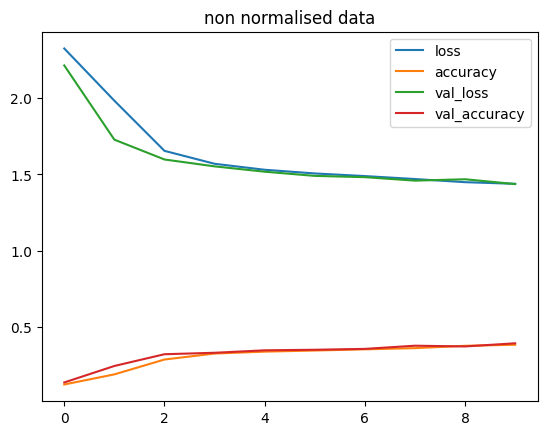

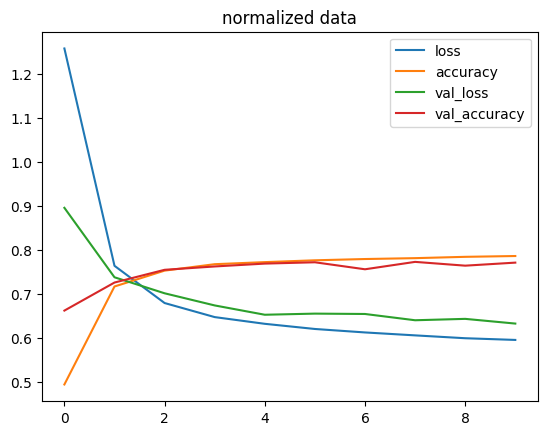

In [36]:
import pandas as pd

# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="non normalised data")

# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="normalized data")


In [38]:
# finding the ideal learning rate

tf.random.set_seed(42)

# createa  new model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model 3
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
fit_lr_history = model_3.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2353 - accuracy: 0.5063 - val_loss: 0.8539 - val_accuracy: 0.6812 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7323 - accuracy: 0.7404 - val_loss: 0.6830 - val_accuracy: 0.7651 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6048 - accuracy: 0.7913 - val_loss: 0.6400 - val_accuracy: 0.7724 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5645 - accuracy: 0.8045 - val_loss: 0.5784 - val_accuracy: 0.8047 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5468 - accuracy: 0.8102 - val_loss: 0.5874 - val_accuracy: 0.7976 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5349 - accuracy: 0.8138 - val_loss: 0.6110 - val_accuracy: 0.7878 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'finding the ideal learning rate')

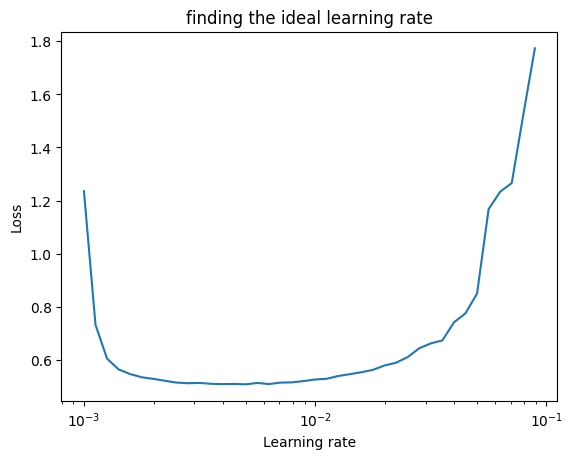

In [39]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))

plt.semilogx(lrs, fit_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("finding the ideal learning rate")

In [40]:
10 ** -3

0.001

In [42]:
# Let's refit the model with the ideal rearning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
history_4 = model_4.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3033 - accuracy: 0.5294 - val_loss: 0.9213 - val_accuracy: 0.6666
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8133 - accuracy: 0.7038 - val_loss: 0.7681 - val_accuracy: 0.7201
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6713 - accuracy: 0.7665 - val_loss: 0.6606 - val_accuracy: 0.7747
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6127 - accuracy: 0.7895 - val_loss: 0.6288 - val_accuracy: 0.7855
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5885 - accuracy: 0.7965 - val_loss: 0.6331 - val_accuracy: 0.7813
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5706 - accuracy: 0.8016 - val_loss: 0.6217 - val_accuracy: 0.7801
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5600 - accuracy: 0.8068 - val_loss: 0.6197 - val_accuracy

## Evaluating the multiclass Classification model

In [45]:
# make some predicitions with the model

y_probs = model_4.predict(test_data_norm)

# visualize the first probabilities
y_probs[0]

313/313 [==============================] - 1s 3ms/step


array([0.00620748, 0.0012159 , 0.00335565, 0.00167631, 0.0008778 ,
       0.52624726, 0.0042906 , 0.13946435, 0.0403226 , 0.27634215],
      dtype=float32)

In [47]:
class_name[tf.argmax(y_probs[0])]

'Sandal'

In [50]:
# convert the predictions to integers
y_preds = y_probs.argmax(axis=1)

# viewing the 1st 10 labels
y_preds[:10], test_labels[:10]

(array([5, 2, 1, 1, 6, 1, 8, 6, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

## It's a good idea to visualize how the model is performing with the predictions

In [59]:
import random
import matplotlib.pyplot as plt

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image  labels witha prediction with truth label
  """
  # set up random integer
  i = random.randint(0, len(images))

  # Create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add label info (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
  color=color)

1/1 [==============================] - 0s 21ms/step


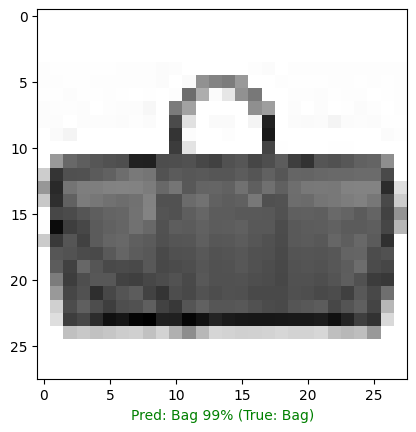

In [93]:
# Checkign out the random image as well as it's prediction
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_name)